In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from scipy.fft import rfft, rfftfreq
import json
import pandas as pd

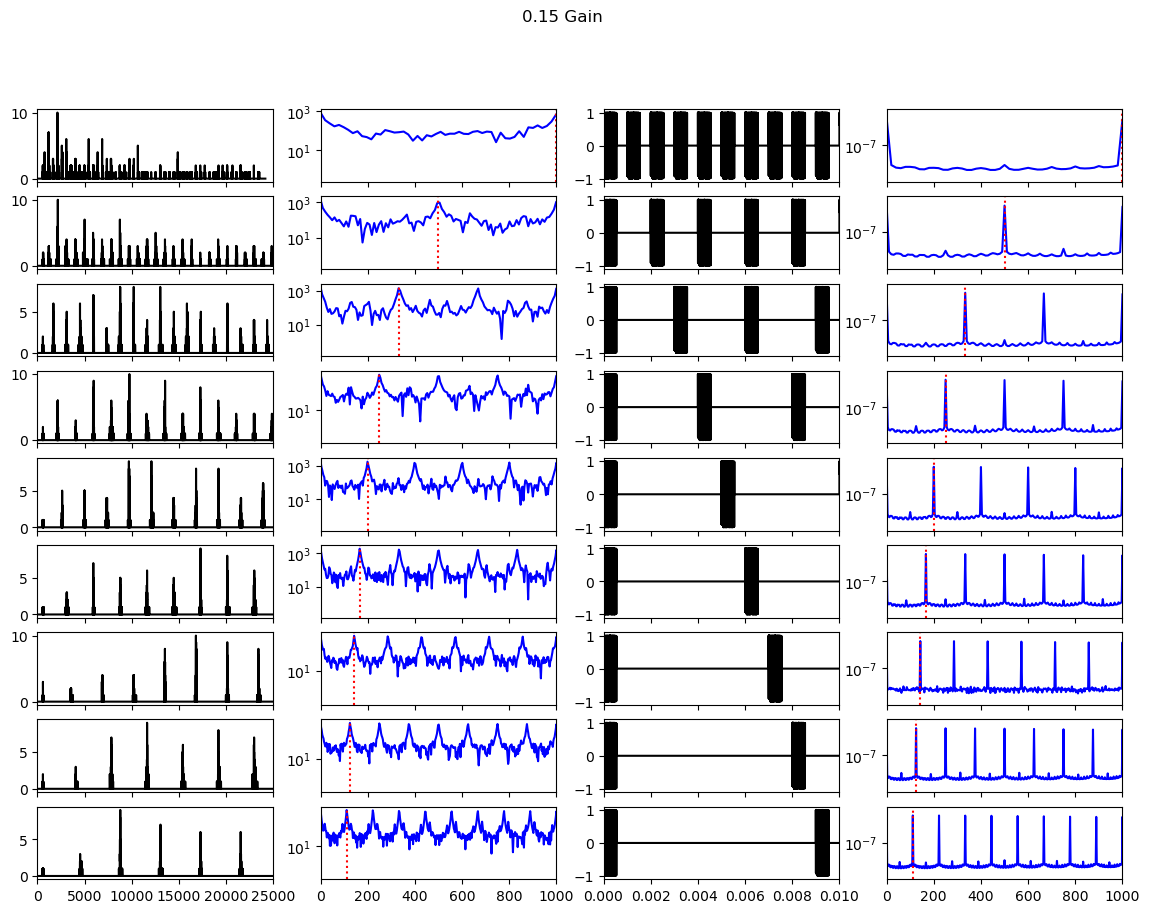

In [2]:
DIR = "../../results/point15_gain"
import os
dirs = [d for d in os.listdir(DIR) if d.startswith("rfko_quadcollapse")]
dirs.sort(key=lambda d: int(d.split("_")[2][1]))

fig, ax = plt.subplots(len(dirs), 4, figsize=(14, 10), sharex='col')
fig.suptitle("0.15 Gain")

tf_df_15 = pd.DataFrame(columns=["driving_frequency", "spill_to_signal"])
for i, d in enumerate(dirs):

    # load chirp_signal.pkl
    try:
        chirp_sig = pkl.load(open(DIR + "/" + d + "/chirp_signal.pkl", "rb"))
        # load chirp_time.pkl
        chirp_time = pkl.load(open(DIR + "/" + d + "/chirp_time.pkl", "rb"))
        # load turn_counts.pkl
        turn_counts = pkl.load(open(DIR + "/" + d + "/turn_counts.pkl", "rb"))
        particles = pd.read_parquet(DIR + "/" + d + "/particles.parquet")
        chirp_fft_y = rfft(chirp_sig)
        chirp_fft_x = rfftfreq(len(chirp_sig), d=1/1e6)

        constants = json.load(open(DIR + "/" + d + "/constants.json", "r"))
        driving_interval = constants['rfko']['CHIRP_INTERVAL']
        driving_frequency = 1/driving_interval
        # Spill
        FREV = 1/473128.56479373755
        counts_fft_y = rfft(turn_counts)
        counts_fft_x = rfftfreq(len(turn_counts), d = FREV)

        ax[i, 0].plot(turn_counts, 'k')
        ax[i, 0].set_xlim(0, 25000)
        ax[i, 1].plot(counts_fft_x, np.abs(counts_fft_y), 'b-')
        ax[i, 1].set_xlim(0, 1000)
        ax[i, 1].set_yscale("log")

        def find_nearest(array, value):
            idx = (np.abs(array - value)).argmin()
            return idx
        counts_nearest_to_driving = find_nearest(counts_fft_x, driving_frequency)
        counts_nearest_value = counts_fft_y[counts_nearest_to_driving]
        
        # Signal

        try: 
            ax[i, 2].plot(chirp_time, chirp_sig[:len(chirp_time)], 'k')
        except ValueError:
            ax[i, 2].plot(chirp_time[:len(chirp_sig)], chirp_sig, 'k')

        ax[i, 2].set_xlim(0, 0.01)

        

        ax[i, 3].plot(chirp_fft_x, np.abs(chirp_fft_y), 'b-')
        ax[i, 3].set_xlim(0, 1000)
        ax[i, 3].set_yscale("log")

        ax[i, 1].axvline(driving_frequency, color='r', linestyle=':')
        ax[i, 3].axvline(driving_frequency, color='r', linestyle=':')

        chirp_nearest_to_driving = find_nearest(chirp_fft_x, driving_frequency)
        chirp_nearest_value = chirp_fft_y[chirp_nearest_to_driving]
        
        data_point = (np.abs(driving_frequency), np.abs(counts_nearest_value/chirp_nearest_value))
        tf_df_15.loc[len(tf_df_15)] = data_point
        #spill_sig_at_driving_frequency = np.abs(chirp_fft_y[np.round_(chirp_fft_x, 0) == driving_frequency][0])
        

        # if i==2:
        #     ffig, aax = plt.subplots(2, 2, figsize=(8, 3), tight_layout=True, sharex='col')
        #     aax[0, 0].plot(turn_counts, 'k')
        #     aax[0, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

        #     aax[0, 1].plot(counts_fft_x, np.abs(counts_fft_y), 'b-')
        #     aax[0, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        #     aax[0, 1].set_yscale('log')

        #     try: 
        #         aax[1, 0].plot(chirp_time, chirp_sig[:len(chirp_time)], 'k')
        #     except ValueError:
        #         aax[1, 0].plot(chirp_time[:len(chirp_sig)], chirp_sig, 'k')
        #     aax[1, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        #     aax[1, 0].set_xlim(0, 1e-2)
        #     aax[1, 0].set_xticks([0, 0.005, 0.01])

        #     aax[1, 1].plot(chirp_fft_x, np.abs(chirp_fft_y), 'b-')
        #     aax[1, 1].set_yscale('log')
        #     aax[1, 1].set_xlim(0, 550)
        #     aax[0, 1].set_xlim(0, 550)

        #     aax[0, 1].axvline(driving_frequency, color='r', linestyle='-', alpha=0.9, zorder=-1)
        #     aax[1, 1].axvline(driving_frequency, color='r', linestyle='-', alpha=0.9, zorder=-1)


        #     aax[1, 1].set_xlabel("Hz")


        #     aax[0, 1].set_title("Simulation data")

        #     xlabels = np.array([0,2e4,4e4,6e4,8e4])
        #     aax[0, 0].set_xticks(xlabels)
        #     aax[0, 0].set_xticklabels((xlabels*FREV).round(decimals=3))



    except FileNotFoundError:
        pass

In [3]:
DIR = "../../results/point1_gain"
import os
dirs = [d for d in os.listdir(DIR) if d.startswith("I")]
dirs.sort(key=lambda d: int(d.split('I')[1].split('ms')[0]))

fig, ax = plt.subplots(len(dirs), 4, figsize=(14, 10), sharex='col')
fig.suptitle("0.1 Gain")

tf_df_1 = pd.DataFrame(columns=["driving_frequency", "spill_to_signal"])
for i, d in enumerate(dirs):

    # load chirp_signal.pkl
    try:
        chirp_sig = pkl.load(open(DIR + "/" + d + "/chirp_signal.pkl", "rb"))
        # load chirp_time.pkl
        chirp_time = pkl.load(open(DIR + "/" + d + "/chirp_time.pkl", "rb"))
        # load turn_counts.pkl
        turn_counts = pkl.load(open(DIR + "/" + d + "/turn_counts.pkl", "rb"))
        particles = pd.read_parquet(DIR + "/" + d + "/particles.parquet")
        chirp_fft_y = rfft(chirp_sig)
        chirp_fft_x = rfftfreq(len(chirp_sig), d=1/1e6)

        constants = json.load(open(DIR + "/" + d + "/constants.json", "r"))
        driving_interval = constants['rfko']['CHIRP_INTERVAL']
        driving_frequency = 1/driving_interval
        # Spill
        FREV = 1/473128.56479373755
        counts_fft_y = rfft(turn_counts)
        counts_fft_x = rfftfreq(len(turn_counts), d = FREV)

        ax[i, 0].plot(turn_counts, 'k')
        ax[i, 1].plot(counts_fft_x, np.abs(counts_fft_y), 'b-')
        ax[i, 1].set_xlim(0, 1000)
        ax[i, 1].set_yscale("log")

        def find_nearest(array, value):
            idx = (np.abs(array - value)).argmin()
            return idx
        counts_nearest_to_driving = find_nearest(counts_fft_x, driving_frequency)
        counts_nearest_value = counts_fft_y[counts_nearest_to_driving]
        
        # Signal

        try: 
            ax[i, 2].plot(chirp_time, chirp_sig[:len(chirp_time)], 'k')
        except ValueError:
            ax[i, 2].plot(chirp_time[:len(chirp_sig)], chirp_sig, 'k')

        ax[i, 2].set_xlim(0, 0.01)

        

        ax[i, 3].plot(chirp_fft_x, np.abs(chirp_fft_y), 'b-')
        ax[i, 3].set_xlim(0, 1000)
        ax[i, 3].set_yscale("log")

        ax[i, 1].axvline(driving_frequency, color='r', linestyle=':')
        ax[i, 3].axvline(driving_frequency, color='r', linestyle=':')

        chirp_nearest_to_driving = find_nearest(chirp_fft_x, driving_frequency)
        chirp_nearest_value = chirp_fft_y[chirp_nearest_to_driving]
        
        data_point = (np.abs(driving_frequency), np.abs(counts_nearest_value/chirp_nearest_value))
        tf_df_1.loc[len(tf_df_1)] = data_point
        #spill_sig_at_driving_frequency = np.abs(chirp_fft_y[np.round_(chirp_fft_x, 0) == driving_frequency][0])
        

        # if i==2:
        #     ffig, aax = plt.subplots(2, 2, figsize=(8, 3), tight_layout=True, sharex='col')
        #     aax[0, 0].plot(turn_counts, 'k')
        #     aax[0, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

        #     aax[0, 1].plot(counts_fft_x, np.abs(counts_fft_y), 'b-')
        #     aax[0, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        #     aax[0, 1].set_yscale('log')

        #     try: 
        #         aax[1, 0].plot(chirp_time, chirp_sig[:len(chirp_time)], 'k')
        #     except ValueError:
        #         aax[1, 0].plot(chirp_time[:len(chirp_sig)], chirp_sig, 'k')
        #     aax[1, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        #     aax[1, 0].set_xlim(0, 1e-2)
        #     aax[1, 0].set_xticks([0, 0.005, 0.01])

        #     aax[1, 1].plot(chirp_fft_x, np.abs(chirp_fft_y), 'b-')
        #     aax[1, 1].set_yscale('log')
        #     aax[1, 1].set_xlim(0, 550)
        #     aax[0, 1].set_xlim(0, 550)

        #     aax[0, 1].axvline(driving_frequency, color='r', linestyle='-', alpha=0.9, zorder=-1)
        #     aax[1, 1].axvline(driving_frequency, color='r', linestyle='-', alpha=0.9, zorder=-1)


        #     aax[1, 1].set_xlabel("Hz")


        #     aax[0, 1].set_title("Simulation data")

        #     xlabels = np.array([0,2e4,4e4,6e4,8e4])
        #     aax[0, 0].set_xticks(xlabels)
        #     aax[0, 0].set_xticklabels((xlabels*FREV).round(decimals=3))



    except FileNotFoundError:
        pass



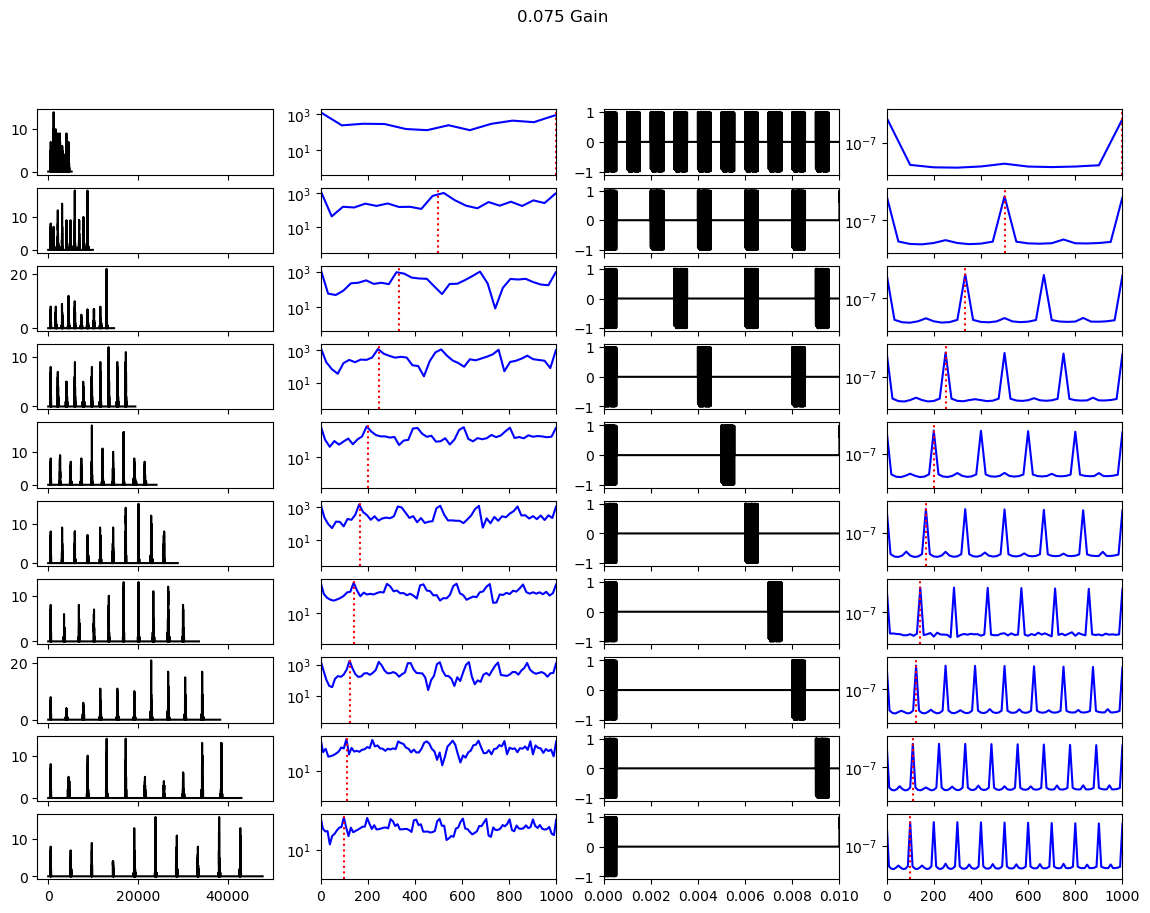

In [4]:
DIR = "../../results/point075_gain"
import os
dirs = [d for d in os.listdir(DIR) if d.startswith("I")]
dirs.sort(key=lambda d: int(d.split('I')[1].split('ms')[0]))

fig, ax = plt.subplots(len(dirs), 4, figsize=(14, 10), sharex='col')
fig.suptitle("0.075 Gain")

tf_df_075 = pd.DataFrame(columns=["driving_frequency", "spill_to_signal"])
for i, d in enumerate(dirs):

    # load chirp_signal.pkl
    try:
        chirp_sig = pkl.load(open(DIR + "/" + d + "/chirp_signal.pkl", "rb"))
        # load chirp_time.pkl
        chirp_time = pkl.load(open(DIR + "/" + d + "/chirp_time.pkl", "rb"))
        # load turn_counts.pkl
        turn_counts = pkl.load(open(DIR + "/" + d + "/turn_counts.pkl", "rb"))
        particles = pd.read_parquet(DIR + "/" + d + "/particles.parquet")
        chirp_fft_y = rfft(chirp_sig)
        chirp_fft_x = rfftfreq(len(chirp_sig), d=1/1e6)

        constants = json.load(open(DIR + "/" + d + "/constants.json", "r"))
        driving_interval = constants['rfko']['CHIRP_INTERVAL']
        driving_frequency = 1/driving_interval
        # Spill
        FREV = 1/473128.56479373755
        counts_fft_y = rfft(turn_counts)
        counts_fft_x = rfftfreq(len(turn_counts), d = FREV)

        ax[i, 0].plot(turn_counts, 'k')
        ax[i, 1].plot(counts_fft_x, np.abs(counts_fft_y), 'b-')
        ax[i, 1].set_xlim(0, 1000)
        ax[i, 1].set_yscale("log")

        def find_nearest(array, value):
            idx = (np.abs(array - value)).argmin()
            return idx
        counts_nearest_to_driving = find_nearest(counts_fft_x, driving_frequency)
        counts_nearest_value = counts_fft_y[counts_nearest_to_driving]
        
        # Signal

        try: 
            ax[i, 2].plot(chirp_time, chirp_sig[:len(chirp_time)], 'k')
        except ValueError:
            ax[i, 2].plot(chirp_time[:len(chirp_sig)], chirp_sig, 'k')

        ax[i, 2].set_xlim(0, 0.01)

        

        ax[i, 3].plot(chirp_fft_x, np.abs(chirp_fft_y), 'b-')
        ax[i, 3].set_xlim(0, 1000)
        ax[i, 3].set_yscale("log")

        ax[i, 1].axvline(driving_frequency, color='r', linestyle=':')
        ax[i, 3].axvline(driving_frequency, color='r', linestyle=':')

        chirp_nearest_to_driving = find_nearest(chirp_fft_x, driving_frequency)
        chirp_nearest_value = chirp_fft_y[chirp_nearest_to_driving]
        
        data_point = (np.abs(driving_frequency), np.abs(counts_nearest_value/chirp_nearest_value))
        tf_df_075.loc[len(tf_df_075)] = data_point
        #spill_sig_at_driving_frequency = np.abs(chirp_fft_y[np.round_(chirp_fft_x, 0) == driving_frequency][0])
        

        # if i==2:
        #     ffig, aax = plt.subplots(2, 2, figsize=(8, 3), tight_layout=True, sharex='col')
        #     aax[0, 0].plot(turn_counts, 'k')
        #     aax[0, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

        #     aax[0, 1].plot(counts_fft_x, np.abs(counts_fft_y), 'b-')
        #     aax[0, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        #     aax[0, 1].set_yscale('log')

        #     try: 
        #         aax[1, 0].plot(chirp_time, chirp_sig[:len(chirp_time)], 'k')
        #     except ValueError:
        #         aax[1, 0].plot(chirp_time[:len(chirp_sig)], chirp_sig, 'k')
        #     aax[1, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        #     aax[1, 0].set_xlim(0, 1e-2)
        #     aax[1, 0].set_xticks([0, 0.005, 0.01])

        #     aax[1, 1].plot(chirp_fft_x, np.abs(chirp_fft_y), 'b-')
        #     aax[1, 1].set_yscale('log')
        #     aax[1, 1].set_xlim(0, 550)
        #     aax[0, 1].set_xlim(0, 550)

        #     aax[0, 1].axvline(driving_frequency, color='r', linestyle='-', alpha=0.9, zorder=-1)
        #     aax[1, 1].axvline(driving_frequency, color='r', linestyle='-', alpha=0.9, zorder=-1)


        #     aax[1, 1].set_xlabel("Hz")


        #     aax[0, 1].set_title("Simulation data")

        #     xlabels = np.array([0,2e4,4e4,6e4,8e4])
        #     aax[0, 0].set_xticks(xlabels)
        #     aax[0, 0].set_xticklabels((xlabels*FREV).round(decimals=3))



    except FileNotFoundError:
        pass



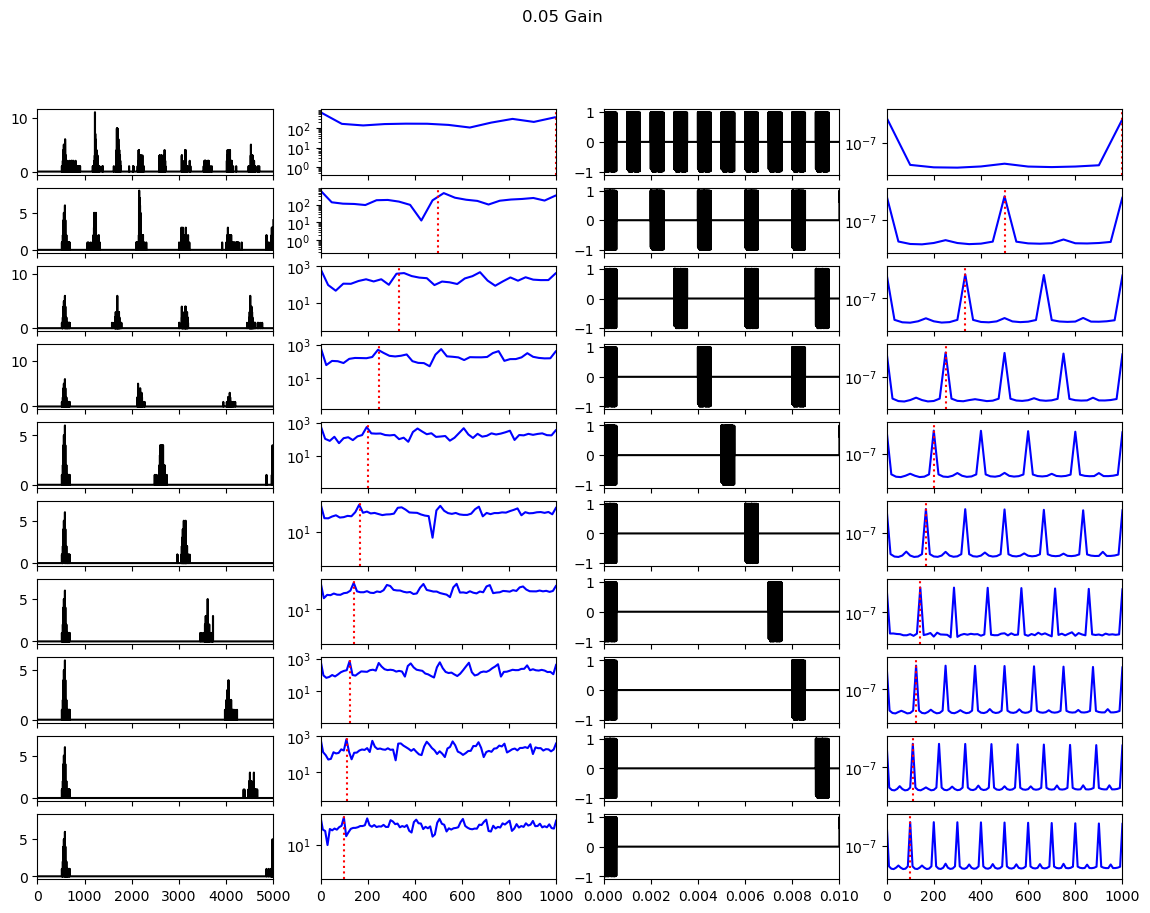

In [5]:
DIR = "../../results/point05_gain"
import os
dirs = [d for d in os.listdir(DIR) if d.startswith("I")]
dirs.sort(key=lambda d: int(d.split('I')[1].split('ms')[0]))

fig, ax = plt.subplots(len(dirs), 4, figsize=(14, 10), sharex='col')
fig.suptitle("0.05 Gain")

tf_df_05 = pd.DataFrame(columns=["driving_frequency", "spill_to_signal"])
for i, d in enumerate(dirs):

    # load chirp_signal.pkl
    try:
        chirp_sig = pkl.load(open(DIR + "/" + d + "/chirp_signal.pkl", "rb"))
        # load chirp_time.pkl
        chirp_time = pkl.load(open(DIR + "/" + d + "/chirp_time.pkl", "rb"))
        # load turn_counts.pkl
        turn_counts = pkl.load(open(DIR + "/" + d + "/turn_counts.pkl", "rb"))
        particles = pd.read_parquet(DIR + "/" + d + "/particles.parquet")
        chirp_fft_y = rfft(chirp_sig)
        chirp_fft_x = rfftfreq(len(chirp_sig), d=1/1e6)

        constants = json.load(open(DIR + "/" + d + "/constants.json", "r"))
        driving_interval = constants['rfko']['CHIRP_INTERVAL']
        driving_frequency = 1/driving_interval
        # Spill
        FREV = 1/473128.56479373755
        counts_fft_y = rfft(turn_counts)
        counts_fft_x = rfftfreq(len(turn_counts), d = FREV)

        ax[i, 0].plot(turn_counts, 'k')
        ax[i, 0].set_xlim(0, 5000)
        ax[i, 1].plot(counts_fft_x, np.abs(counts_fft_y), 'b-')
        ax[i, 1].set_xlim(0, 1000)
        ax[i, 1].set_yscale("log")

        def find_nearest(array, value):
            idx = (np.abs(array - value)).argmin()
            return idx
        counts_nearest_to_driving = find_nearest(counts_fft_x, driving_frequency)
        counts_nearest_value = counts_fft_y[counts_nearest_to_driving]
        
        # Signal

        try: 
            ax[i, 2].plot(chirp_time, chirp_sig[:len(chirp_time)], 'k')
        except ValueError:
            ax[i, 2].plot(chirp_time[:len(chirp_sig)], chirp_sig, 'k')

        ax[i, 2].set_xlim(0, 0.01)

        

        ax[i, 3].plot(chirp_fft_x, np.abs(chirp_fft_y), 'b-')
        ax[i, 3].set_xlim(0, 1000)
        ax[i, 3].set_yscale("log")

        ax[i, 1].axvline(driving_frequency, color='r', linestyle=':')
        ax[i, 3].axvline(driving_frequency, color='r', linestyle=':')

        chirp_nearest_to_driving = find_nearest(chirp_fft_x, driving_frequency)
        chirp_nearest_value = chirp_fft_y[chirp_nearest_to_driving]
        
        data_point = (np.abs(driving_frequency), np.abs(counts_nearest_value/chirp_nearest_value))
        tf_df_05.loc[len(tf_df_05)] = data_point
        #spill_sig_at_driving_frequency = np.abs(chirp_fft_y[np.round_(chirp_fft_x, 0) == driving_frequency][0])
        

        # if i==2:
        #     ffig, aax = plt.subplots(2, 2, figsize=(8, 3), tight_layout=True, sharex='col')
        #     aax[0, 0].plot(turn_counts, 'k')
        #     aax[0, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

        #     aax[0, 1].plot(counts_fft_x, np.abs(counts_fft_y), 'b-')
        #     aax[0, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        #     aax[0, 1].set_yscale('log')

        #     try: 
        #         aax[1, 0].plot(chirp_time, chirp_sig[:len(chirp_time)], 'k')
        #     except ValueError:
        #         aax[1, 0].plot(chirp_time[:len(chirp_sig)], chirp_sig, 'k')
        #     aax[1, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        #     aax[1, 0].set_xlim(0, 1e-2)
        #     aax[1, 0].set_xticks([0, 0.005, 0.01])

        #     aax[1, 1].plot(chirp_fft_x, np.abs(chirp_fft_y), 'b-')
        #     aax[1, 1].set_yscale('log')
        #     aax[1, 1].set_xlim(0, 550)
        #     aax[0, 1].set_xlim(0, 550)

        #     aax[0, 1].axvline(driving_frequency, color='r', linestyle='-', alpha=0.9, zorder=-1)
        #     aax[1, 1].axvline(driving_frequency, color='r', linestyle='-', alpha=0.9, zorder=-1)


        #     aax[1, 1].set_xlabel("Hz")


        #     aax[0, 1].set_title("Simulation data")

        #     xlabels = np.array([0,2e4,4e4,6e4,8e4])
        #     aax[0, 0].set_xticks(xlabels)
        #     aax[0, 0].set_xticklabels((xlabels*FREV).round(decimals=3))



    except FileNotFoundError:
        pass



In [6]:
tf_df_1

driving_frequency  spill_to_signal
0        1000.000000       342.969661
1         500.000000       214.422699
2         333.333333       122.555956
3         250.000000       135.542508
4         200.000000       139.904961
5         166.666667       148.913370
6         142.857143       141.971533
7         125.000000       161.009888
8         111.111111       181.841248
9         100.000000       152.530117

In [7]:
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.plot(tf_df_15['driving_frequency'], tf_df_15['spill_to_signal'], 'x--', label="Gain: 0.15")
ax.plot(tf_df_1['driving_frequency'], tf_df_1['spill_to_signal'], 'x--', label="Gain: 0.1")
ax.plot(tf_df_075['driving_frequency'], tf_df_075['spill_to_signal'], 'x--', label="Gain: 0.075")
ax.plot(tf_df_05['driving_frequency'], tf_df_05['spill_to_signal'], 'x--', label="Gain: 0.05")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Interval Frequency (Hz)')
ax.set_ylabel(r'$A_{out}/A_{in}$ (arb.)')
#ax.set_title('Simulated fixed Amplitude Transfer Function\nof RFKO Slow Extraction')
ax.legend(loc='upper left', ncol=2)
ax.set_xticks([100, 500, 1000])
ax.set_xticklabels([100, 500, 1000])
#ax.text(x=350, y=2.2*10**1, s=r'$DRAFT$', color='red', alpha=.2, fontsize=100, ha='center', va='center')

[Text(100, 0, '100'), Text(500, 0, '500'), Text(1000, 0, '1000')]

In [8]:
tf_df.to_hdf("../../tf_df_g15.hdf", key="tf_df_g15")

NameError: name 'tf_df' is not defined

In [ ]:
fig, ax = plt.subplots()
ax.scatter(particles.x, particles.px)

In [ ]:
particles.keys()